In [1]:
import pyodbc
import matplotlib.pyplot as plt
import io
import os
from PIL import Image
from numpy import asarray
import numpy as np
import cv2
from mtcnn.mtcnn import MTCNN
from numpy import expand_dims
from sklearn.tree import DecisionTreeClassifier
from tkinter import *
from tkinter import filedialog
import imageio
from PIL import ImageTk,Image
import tkinter.font as font
from playsound import playsound

In [1]:

 
 
'''
conn = pyodbc.connect( 'Trusted_Connection=yes', Driver = "{SQL Server Native Client 11.0};" , Server= 'DESKTOP-E7I8FQH' , Database= 'Pictures')
 
 
 
d = "D:\FCAIH Material\Subjects Third Year\First Term\Artificial Intelligence\Project\Project 20 Code\images"
i=0
x=0
y=0
for path in os.listdir(d):
    if y==50:
        i=0
        x=0
    elif y > 50:
        if x == 5:
            i += 1
            x =0
    elif x==10:
        i += 1
        x = 0
    
    full_path = os.path.join(d, path)
    if os.path.isfile(full_path):
        cursor = conn.cursor()
        cursor.execute("insert into ImageTable (Class, image) values ("+str(i)+", (SELECT BulkColumn FROM Openrowset( Bulk '"+full_path+"', Single_Blob) as img))")
        cursor.commit()
    x +=1
    y +=1

'''

'\nconn = pyodbc.connect( \'Trusted_Connection=yes\', Driver = "{SQL Server Native Client 11.0};" , Server= \'DESKTOP-E7I8FQH\' , Database= \'Pictures\')\n \n \n \nd = "D:\\FCAIH Material\\Subjects Third Year\\First Term\\Artificial Intelligence\\Project\\images"\ni=0\nx=0\ny=0\nfor path in os.listdir(d):\n    if y==50:\n        i=0\n        x=0\n    elif y > 50:\n        if x == 5:\n            i += 1\n            x =0\n    elif x==10:\n        i += 1\n        x = 0\n    \n    full_path = os.path.join(d, path)\n    if os.path.isfile(full_path):\n        cursor = conn.cursor()\n        cursor.execute("insert into ImageTable (Class, image) values ("+str(i)+", (SELECT BulkColumn FROM Openrowset( Bulk \'"+full_path+"\', Single_Blob) as img))")\n        cursor.commit()\n    x +=1\n    y +=1\n\n'

In [3]:
#demonstate face detection on 5 Celebrity Faces Dataset
# extract a single face from a given photograph
def extract_face(filename, required_size=(100,100)):
    # load image from file
    image = filename
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # bug fix
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = asarray(image)
    # scale pixel values
    face_pixels = face_array.astype('float32')
    # standardize pixel values across channels (global)
    face_pixels = (face_pixels - np.min(face_pixels)) / (np.max(face_pixels) - np.min(face_pixels))
    face_pixels = cv2.cvtColor(face_pixels, cv2.COLOR_BGR2GRAY)
    # transform face into one sample
    samples = expand_dims(face_pixels, axis=0)
    samples=samples.flatten()
    return samples

In [4]:
id=[]
images=[]
X_train=[]
y_train=[]
X_test=[]
y_test=[]

conn = pyodbc.connect( 'Trusted_Connection=yes', Driver = "{SQL Server Native Client 11.0};" , Server= 'DESKTOP-E7I8FQH' , Database= 'Pictures')



global img

cursor = conn.cursor()

cursor.execute("select * from ImageTable")

for row in cursor:
    id.append(row[1])
    images.append(row[2])

for i in range (0,50):
    image = Image.open(io.BytesIO(images[i]))
    face=extract_face(image).reshape(1,-1)
    X_train.append(face)
    y_train.append(id[i])
    
for i in range (50,len(images)):
    image = Image.open(io.BytesIO(images[i]))
    face=extract_face(image).reshape(1,-1)
    X_test.append(face)
    y_test.append(id[i])

In [5]:
X_train = np.asarray(X_train)
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
y_test = np.asarray(y_test)
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

In [6]:
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=20,random_state=30)
DecisionTreeClassifierModel.fit(X_train, y_train)
print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(X_train, y_train)*100)
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(X_test, y_test)*100)

DecisionTreeClassifierModel Train Score is :  100.0
DecisionTreeClassifierModel Test Score is :  68.0


In [7]:
root = Tk()
bg = ImageTk.PhotoImage(file="ground.jpg")
canvas = Canvas(root,width= 400, height= 300)
canvas.pack(fill= "both", expand=True)
canvas.create_image(0, 0, image=bg, anchor="nw")
root.title("Face Recognition Using Desicion Tree")
root.geometry("1000x702")
myFont1 = font.Font(family="Helvetica",size=12,weight="bold")
myFont2 = font.Font(family="Helvetica",size=18,weight="bold")

def browseImages():
    filename = filedialog.askopenfilename(initialdir = "/", title = "Select an Image",
                                          filetypes = (("jpg","*.jpg*"),
                                                       ("png","*.png*"),
                                                       ("jpeg","*.jpeg*"),
                                                       ("jfif","*.jfif*"),
                                                        )
                                         )
    global imag
    imag=Image.open(filename)
    img=ImageTk.PhotoImage(Image.open(filename).resize((350,350)))
    global label
    label = Label(root, padx=200 ,pady=150)
    label.place(relx = 0.5, rely = 0.42, anchor = 'center')
    label.configure(image=img)
    label.image = img

    
def classify_image(img):
    var = StringVar()
    face=extract_face(img).reshape(1,-1)
    y_pred = DecisionTreeClassifierModel.predict(face)
    global label3
    if(y_pred==0):
            label3 = Label(root,text="Mohamed Salah" , fg = "Black", padx=1000 ,pady=28,font=myFont2)
            label3.place(relx = 0.5, rely = 0.05,anchor='center')
            playsound("D:\FCAIH Material\Subjects Third Year\First Term\Artificial Intelligence\Project\project ai\sounds\Mo Salah, The Egyptian King! _ Learn LFC Songs (mp3cut.net).mp3")
    if(y_pred==1):
            label3 = Label(root,text="Lionel Messi" , fg = "Black", padx=1000 ,pady=28,font=myFont2)
            label3.place(relx = 0.5, rely = 0.05,anchor='center')
            playsound("D:\FCAIH Material\Subjects Third Year\First Term\Artificial Intelligence\Project\project ai\sounds\messi.mp3")
    if(y_pred==2):
            label3 = Label(root,text="Will Smith" , fg = "Black", padx=1000 ,pady=28,font=myFont2)
            label3.place(relx = 0.5, rely = 0.05,anchor='center')
            playsound("D:\FCAIH Material\Subjects Third Year\First Term\Artificial Intelligence\Project\project ai\sounds\mp3-output-ttsfree(dot)comwill.mp3")
    if(y_pred==3):
            label3 = Label(root,text="Cristiano Ronaldo" , fg = "Black", padx=1000 ,pady=28,font=myFont2)
            label3.place(relx = 0.5, rely = 0.05,anchor='center')
            playsound("D:\FCAIH Material\Subjects Third Year\First Term\Artificial Intelligence\Project\project ai\sounds\Siuuu Sound Effect #2.mp3")
    if(y_pred==4):
            label3 = Label(root,text="Angelina Jolie" , fg = "Black", padx=1000 ,pady=28,font=myFont2)
            label3.place(relx = 0.5, rely = 0.05,anchor='center')
            playsound("D:\FCAIH Material\Subjects Third Year\First Term\Artificial Intelligence\Project\project ai\sounds\mp3-output-ttsfree(dot)com.mp3")


def clear_label_image():
    label.destroy()
    label3.destroy()
    

    
def reco():
        classify_image(imag)
        


imageButton = Button(root, text="Browse Image", padx=20 ,pady=5, command=browseImages, fg="white",bg="#533535",font=myFont1,border=0)
imageButton.place(relx = 0.2, rely = 0.84, anchor = 'center')

recognizeButton = Button(root, text="Recognize !", padx=20 ,pady=5, command=reco,fg="white",bg="#064635",font=myFont1,border=0)
recognizeButton.place(relx = 0.51, rely = 0.88, anchor = 'center')

clearButton = Button(root, text="Clear image", padx=20 ,pady=5, command=clear_label_image,fg="white",bg="#533535",font=myFont1,border=0)
clearButton.place(relx = 0.8, rely = 0.84, anchor = 'center')



root.mainloop()

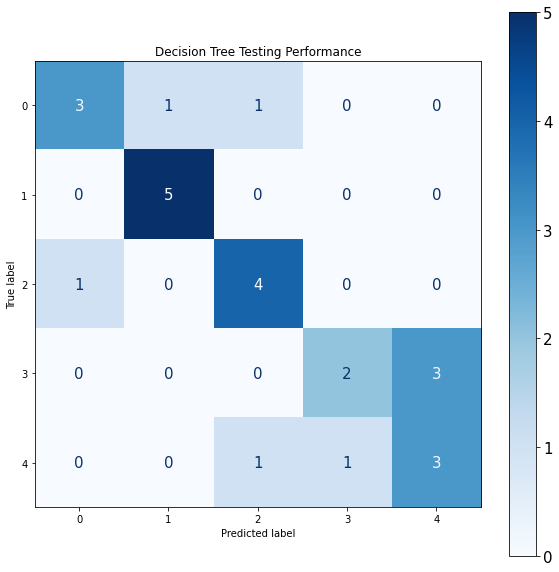

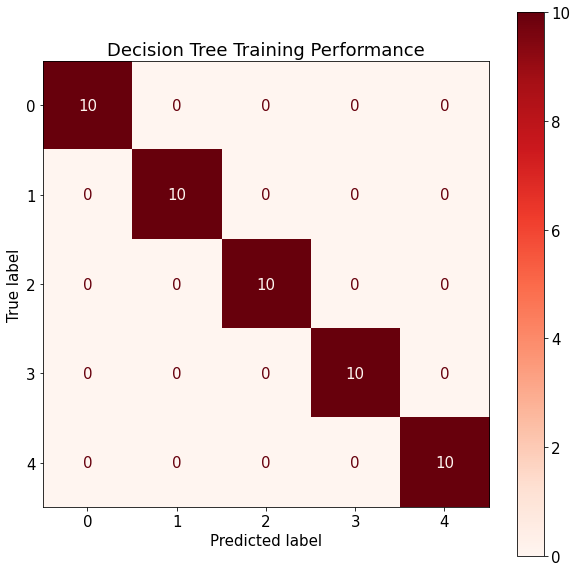

In [8]:

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Decision Tree Testing Performance');
plt.rcParams.update({'font.size': 15})
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(DecisionTreeClassifierModel, X_test, y_test,ax=ax,cmap=plt.cm.Blues) 
plt.savefig('Decision Tree Testing Performance.png')
plt.show()


fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Decision Tree Training Performance');
plt.rcParams.update({'font.size': 15})
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(DecisionTreeClassifierModel, X_train, y_train,ax=ax,cmap=plt.cm.Reds) 
plt.savefig('Decision Tree Training Performance.png')
plt.show()